# Clase 8: Redes neuronales

## Perceptrón

Adaptado del ejemplo de uso de un perceptrón del libro Hands on Machine Learning with Sckit-Learn, Teras & Tensorflow - Aurélien Géron (O’Really) https://github.com/ageron/handson-ml2

Entrenaremos un perceptrón para realizar clasificación lineal en el conjunto iris.

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([1])

Podemos dibujar la frontera de decisión aproximada por el perceptrón.

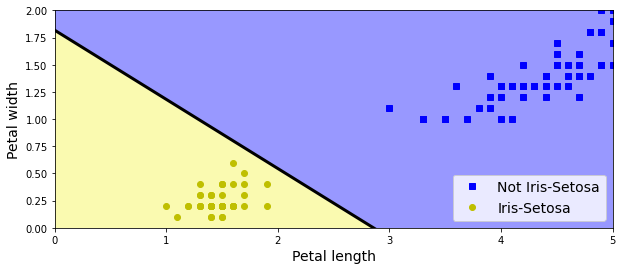

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)

custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

plt.show()

## Perceptrón multicapas

El MNIST es un conjunto de datos desarrollado por Yann LeCun, Corinna Cortes y Christopher Burges para la evaluación de modelos de aprendizaje de máquinas sobre el problema de la clasificación de los dígitos escritos a mano. La base de datos se construyó a partir de varios conjuntos de datos de documentos escaneados disponibles en la carpeta Instituto Nacional de Estándares y Tecnología (NIST).

Las imágenes de los dígitos fueron tomadas de una variedad de documentos escaneados, normalizados en tamaño y centrado. Esto lo convierte en un excelente conjunto de datos para evaluar modelos, permitiendo al desarrollador centrar el aprendizaje de la máquina con muy poca limpieza de datos. Cada imagen tiene 28 x 28 píxeles cuadrados (784 píxeles en total). 

Es una tarea de reconocimiento de dígitos. Como tal, hay 10 dígitos (0 a 9) o 10 clases para predecir. Usaremos el clasificador basado en un preceptrón multicapas de Scikit-learn. Luego visualizaremos los pesos del modelo entrenado.

Adaptado del ejemplo de visualización de pesos de Scikit-learn (https://scikit-learn.org/0.18/auto_examples/neural_networks/plot_mnist_filters.html)

Cargamos los datos de openml https://www.openml.org/d/554. Escalamos los valores de pixeles para que estén en el rango 0 - 1.


In [ ]:
import warnings

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.
X.shape, y.shape

((70000, 784), (70000,))

Separamos el dataset en conjuntos de entrenamiento y validación (60000, 10000)

In [ ]:
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]
X_train.shape, y_train.shape

((60000, 784), (60000,))

Entrenamos un preceptrón multicapas con una capa oculta de 50 unidades con gradiente decendente estocástica. Puede revisqar la documentación del modelo en: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, random_state=1,
                    learning_rate_init=.1)

# Entrenar ignorando advertencias de convergencia del modelo.
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning,
                            module="sklearn")
    mlp.fit(X_train, y_train)


Iteration 1, loss = 0.32009978
Iteration 2, loss = 0.15347534
Iteration 3, loss = 0.11544755
Iteration 4, loss = 0.09279764
Iteration 5, loss = 0.07889367
Iteration 6, loss = 0.07170497
Iteration 7, loss = 0.06282111
Iteration 8, loss = 0.05530788
Iteration 9, loss = 0.04960484
Iteration 10, loss = 0.04645355


El modelo alcanzó una exactitud de 97% en el conjunto de validación.

In [ ]:
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.986800
Test set score: 0.970000


Graficamos los pesos obtenidos para algunas de las unidades de la capa oculta. Podemos observar que parecen estar aplicando filtros arbitrarios que no tienen mucho sentido para nosotros. Sin embargo, estos filtros están proporcionando a la red información útil para clasificar las imágenes de entrenamiento.

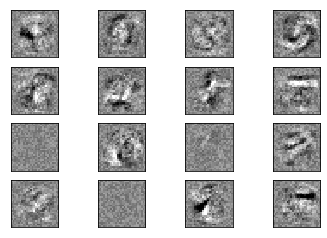

In [ ]:
fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

## Artificial Neural Network - Keras implementation

**Keras** es una biblioteca de Redes Neuronales de Código Abierto escrita en Python. Es capaz de ejecutarse sobre TensorFlow entre otros frameworks. 

Está especialmente diseñada para posibilitar la experimentación en más o menos poco tiempo con redes de **Aprendizaje Profundo**. Sus fuertes se centran en ser **amigable para el usuario, modular y extensible**.

Podemos utilizarla para construir una red neuronal que permita clasificar los números escritos a mano del dataset MNIST. En este caso, se realizará la experimientación con dos capas densas de 64 unidades con activación relu.

In [ ]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import itertools

11493376/11490434 [==============================] - 0s 0us/step


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


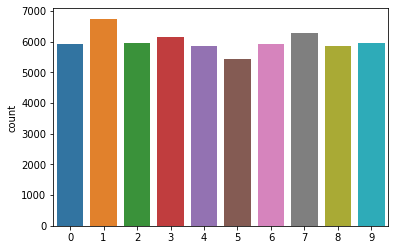

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
sns.countplot(train_labels)

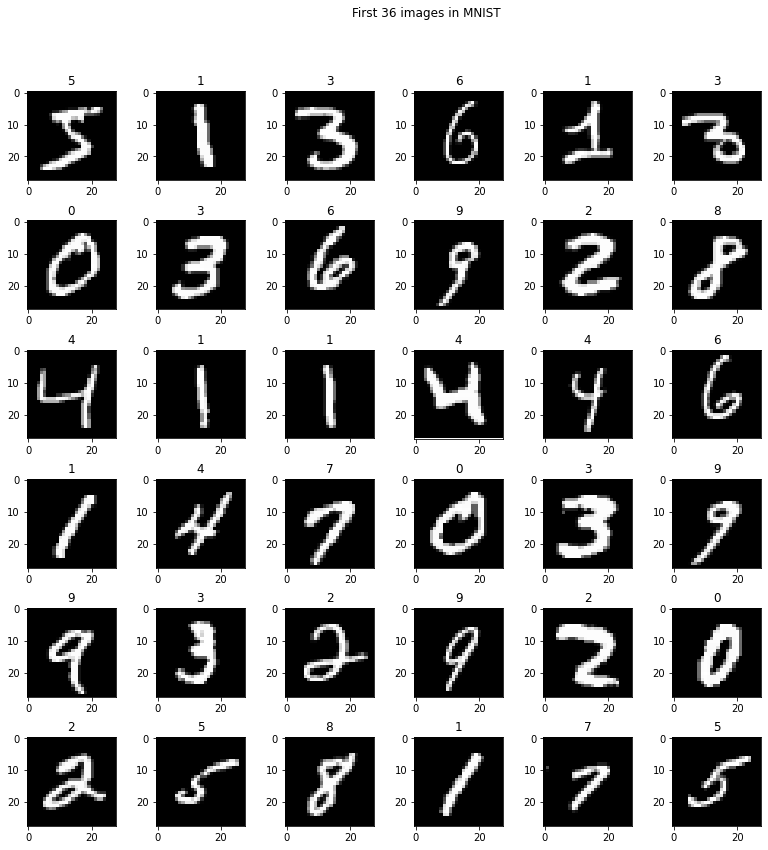

In [ ]:
fig, ax = plt.subplots(6, 6, figsize = (12, 12))
fig.suptitle('First 36 images in MNIST')
fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
for x, y in [(i, j) for i in range(6) for j in range(6)]:
    ax[x, y].imshow(train_images[x + y * 6].reshape((28, 28)), cmap = 'gray')
    ax[x, y].set_title(train_labels[x + y * 6])

In [ ]:
# Normalize the images.
train_images = (train_images / 255.0) 
test_images = (test_images / 255.0) 

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

# Build the model in Keras: 'Dense' son capas densas.
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

# Compile the model.
model.compile(
  optimizer='adam', #optimizacion del proceso de gradient descent
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [ ]:
num_classes = 10
train_labels = keras.utils.to_categorical(train_labels, num_classes)
Train_images, Val_images, Train_labels, Val_labels = train_test_split(train_images, train_labels, test_size = 0.1, random_state=42)

# Train the model.
h = model.fit(
  Train_images,
  Train_labels,
  validation_data=(Val_images, Val_labels),
  epochs=5,
  batch_size=32,
)

Epoch 1/5
1688/1688 [==============================] - 4s 3ms/step - loss: 0.2891 - accuracy: 0.9172 - val_loss: 0.1567 - val_accuracy: 0.9565
Epoch 2/5
1688/1688 [==============================] - 4s 3ms/step - loss: 0.1313 - accuracy: 0.9609 - val_loss: 0.1186 - val_accuracy: 0.9645
Epoch 3/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0932 - accuracy: 0.9718 - val_loss: 0.1043 - val_accuracy: 0.9660
Epoch 4/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0753 - accuracy: 0.9769 - val_loss: 0.0963 - val_accuracy: 0.9720
Epoch 5/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0603 - accuracy: 0.9814 - val_loss: 0.0848 - val_accuracy: 0.9763


### Evaluación del modelo

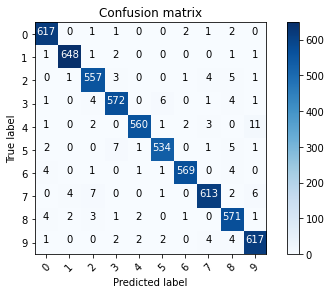

In [ ]:
# Look at confusion matrix 
#Note, this code is taken straight from the SKLEARN website, an nice way of viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(Val_images)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Val_labels, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


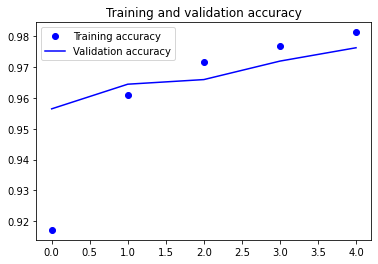

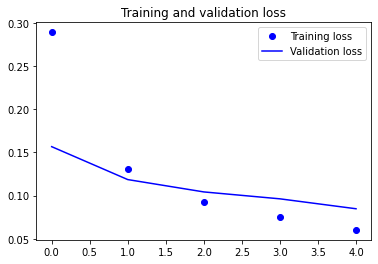

In [ ]:
print(h.history.keys())
accuracy = h.history['accuracy']
val_accuracy = h.history['val_accuracy']
loss = h.history['loss']
val_loss = h.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


### Ejemplos de predicción

In [ ]:
# Predict on the first 5 test images.
predictions = model.predict(test_images[:10])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:10]) # [7, 2, 1, 0, 4]


[7 2 1 0 4 1 4 9 5 9]
[7 2 1 0 4 1 4 9 5 9]


### Reporte de clasificación

In [ ]:
#get the predictions for the test data
predicted_classes = model.predict_classes(test_images)

from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.97      0.99      0.98       980
     Class 1       0.98      0.99      0.99      1135
     Class 2       0.98      0.97      0.97      1032
     Class 3       0.96      0.98      0.97      1010
     Class 4       0.98      0.96      0.97       982
     Class 5       0.97      0.96      0.97       892
     Class 6       0.99      0.97      0.98       958
     Class 7       0.97      0.96      0.97      1028
     Class 8       0.95      0.97      0.96       974
     Class 9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

